# Analysis: USA GDP vs Unemployment Rate

First we import the wbdata, pandas and datetime:

- wbdata is the API to connect with the database of the Worldbank. 
- pandas helps to store the data structually in a dataframe 
- datetime is used to specify the date period we are searching for

In [35]:
import wbdata
import pandas as pd
import datetime

Next we search the relavant indicators for our analysis:

In [69]:
wbdata.search_indicators("unemployment")

id                        name
------------------------  ------------------------------------------------------------------------------------------------------
lm_ub.bi_q1               Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)
lm_ub.cov_pop             Coverage of unemployment benefits and ALMP (% of population)
lm_ub.gen_pop             Generosity of unemployment benefits and ALMP (% of total welfare of beneficiary households)
per_lm_alllm.adq_pop_tot  Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)
per_lm_alllm.ben_q1_tot   Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)
per_lm_alllm.cov_pop_tot  Coverage of unemployment benefits and ALMP (% of population)
per_lm_alllm.cov_q1_tot   Coverage of unemployment benefits and ALMP in poorest quintile (% of population)
per_lm_alllm.cov_q2_tot   Coverage of unemployment benefits and ALMP in

In [76]:
wbdata.search_indicators("GDP")

id                          name
--------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------
5.51.01.10.gdp              Per capita GDP growth
6.0.GDP_current             GDP (current $)
6.0.GDP_growth              GDP growth (annual %)
6.0.GDP_usd                 GDP (constant 2005 $)
6.0.GDPpc_constant          GDP per capita, PPP (constant 2011 international $)
BG.GSR.NFSV.GD.ZS           Trade in services (% of GDP)
BG.KAC.FNEI.GD.PP.ZS        Gross private capital flows (% of GDP, PPP)
BG.KAC.FNEI.GD.ZS           Gross private capital flows (% of GDP)
BG.KLT.DINV.GD.PP.ZS        Gross foreign direct investment (% of GDP, PPP)
BG.KLT.DINV.GD.ZS           Gross foreign direct investment (% of GDP)
BI.WAG.TOTL.GD.ZS           Wage bill as a percentage of GDP
BM.GSR.MRCH.ZS              Merchandise imports (BOP): percentage of GDP (%)
BM.KLT.DINV.GD

Next we specify the countries, indicators and date period to query the data:

In [100]:
countries = ['USA']                                                                                                 
indicators = {"UNEMPSA_": "Unemployment Rate %", "NY.GDP.MKTP.KD.ZG": "GDP Growth Anual %"}   
data_date = datetime.datetime(1988, 1, 1), datetime.datetime(2020, 1, 1)

df = wbdata.get_dataframe(indicators, country=countries, data_date=data_date)   

Preview of data: 

In [109]:
df.head()

,Unemployment Rate %,GDP Growth Anual %
date,,
1988,NaN,4.177046
1989,NaN,3.672656
1990,5.616667,1.885960
1991,6.850000,-0.108259
1992,7.491667,3.522442


In the years 2009 - 2012 the US unemployment rate was higher than 8.5%

In [114]:
df["2009":"2011"]

,Unemployment Rate %,GDP Growth Anual %
date,,
2009,9.283333,-2.536757
2010,9.608333,2.563767
2011,8.933333,1.550836


Plot the GDP growth and the Unemployment rate in one graph to see if they are correlated: 

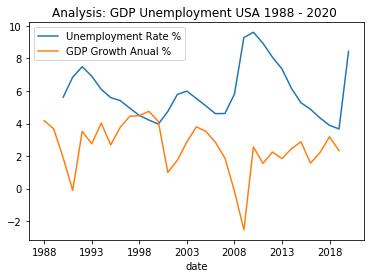

In [106]:
df.plot.line(title="Analysis: GDP Unemployment USA 1988 - 2020 ")

#### After visual inspection of the graph above we can indeed conclude there is a correlation between the Unemployment rate and development of GDP, as expected. After a sharp drop in GDP growhth, such as in the years 1990, 2001 and 2009, you can see a stark increase in unemployment rate with a delay of +/- 1 year. For 2020 there is no GDP data available yet, however one can suspect the GDP will be lower than 2019 due to the Corona crisis. Subsequently we can see a sharp increase in unemployment rate to 8.4% of the working population in 2020. The reverse is also true, if there are longertime of GDP growth the unemployments tends to lower over time. We can see this in the periods 1991 - 2000 and 2010 - 2018.

#### Therefore it can be concluded there is indeed a correlation between GDP and Unemployment. 

In [120]:
def make_dashboard():
    countries = ['USA']                                                                                                 
    indicators = {"UNEMPSA_": "Unemployment Rate %", "NY.GDP.MKTP.KD.ZG": "GDP Growth Anual %"}   
    data_date = datetime.datetime(1988, 1, 1), datetime.datetime(2020, 1, 1)
    df = wbdata.get_dataframe(indicators, country=countries, data_date=data_date)   
    
    return df.plot.line(title="Analysis: GDP Unemployment USA 1988 - 2020 ")

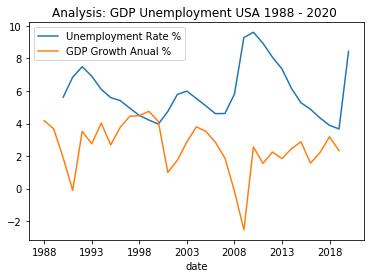

In [121]:
make_dashboard()